In [1]:
import pandas as pd
import os
import tarfile
from six.moves import urllib


In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

In [6]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Let's note 

* there are ten attributes(columns) in our dataset
* there are 20,640 instances(rows) but total_bedrooms has only 20,433
* it might have NA or null values
* all attributes except ocean-proximity have numerical data
* ocean-proximity attribute has words or categorical data, we need to convert it


In [8]:

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


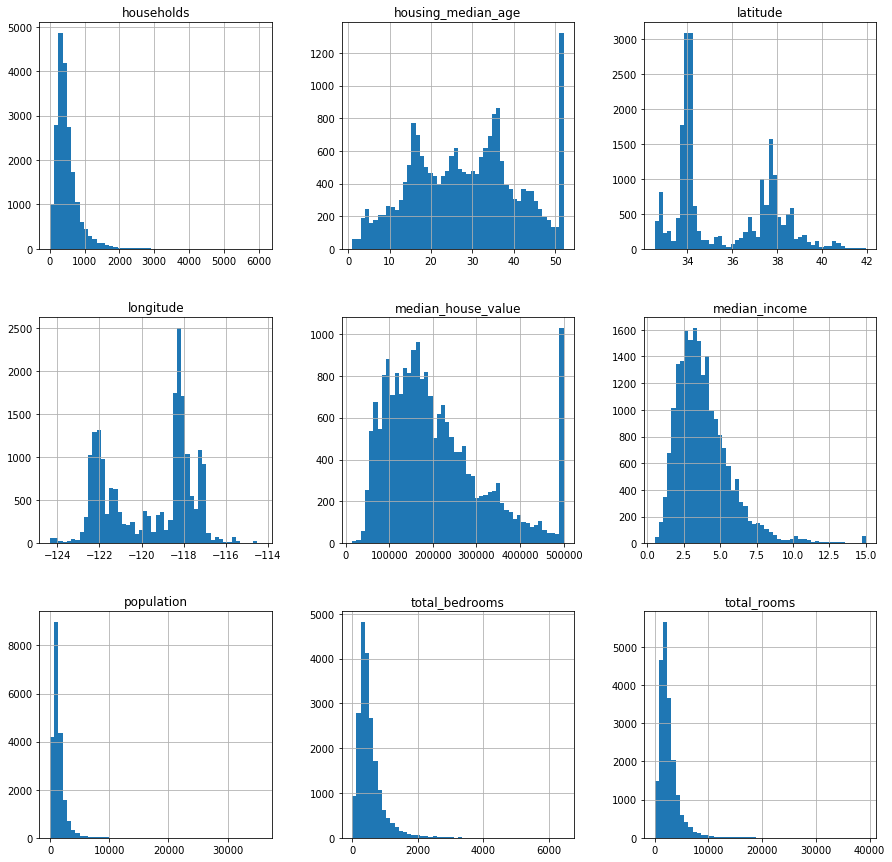

In [11]:
housing.hist(bins=50, figsize=(15, 15))
plt.show()

In [12]:
import numpy as np

In [13]:
housing["income_cat"] = np.ceil(housing["median_income"]/ 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [18]:
housing = strat_train_set.copy()

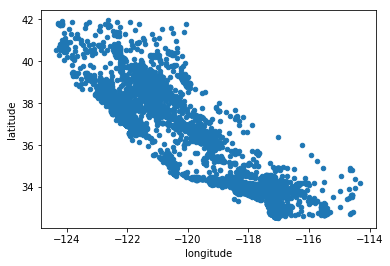

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude')

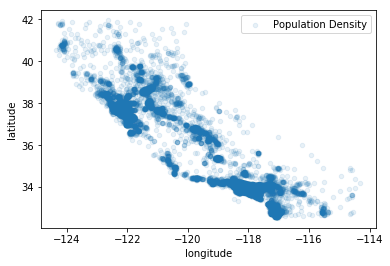

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.1, label="Population Density")

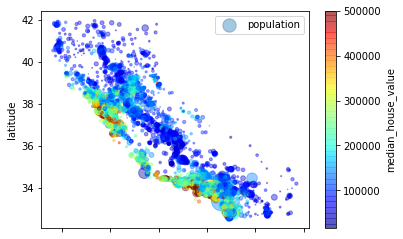

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

* The radius of each circle represents the district’s population (option s)
* The color represents the price (option c).
* We use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00cd843c8>,
      dtype=object)

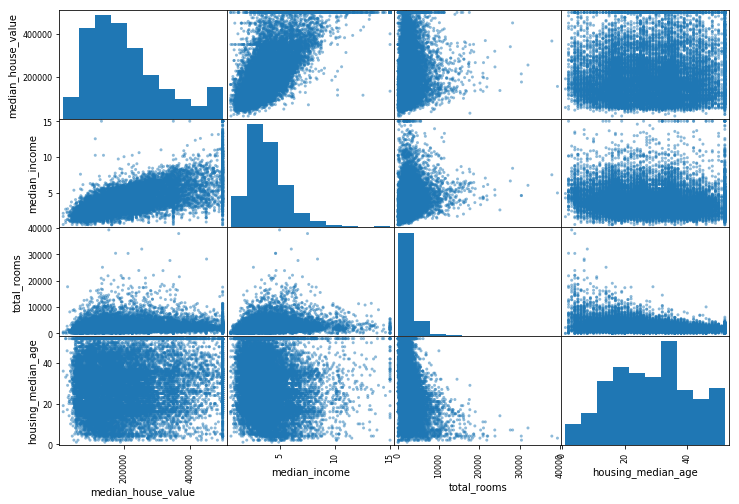

In [25]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

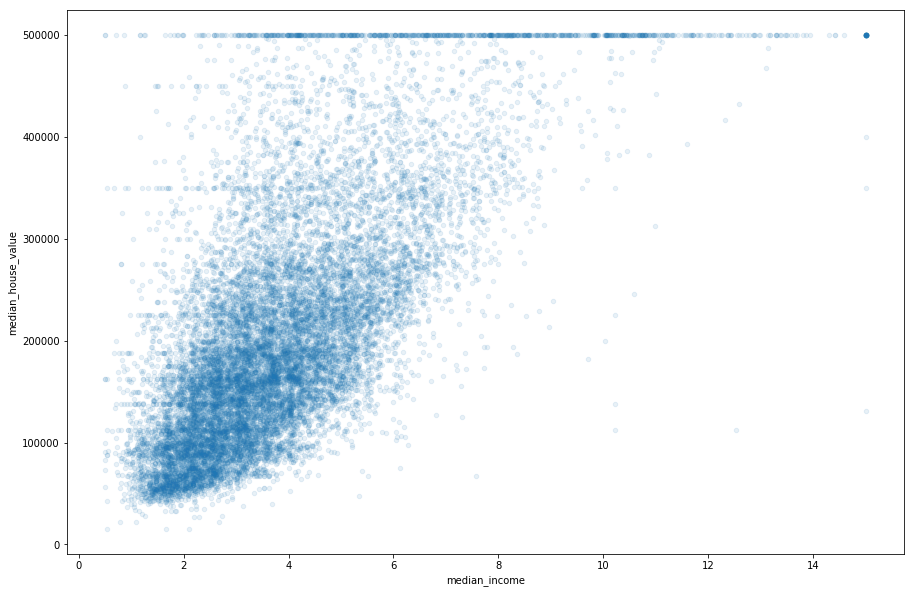

In [26]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1,figsize=(15,10))

In [27]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [29]:
corr_matrix = housing.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [32]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy="median")

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [36]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [37]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [38]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [40]:
X = imputer.transform(housing_num)

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
encoder = LabelEncoder()

In [44]:
housing_cat = housing['ocean_proximity']

In [45]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [46]:
housing_cat_encoded


array([0, 0, 4, ..., 1, 0, 3])

In [47]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder(categories='auto')

In [50]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))


In [51]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [52]:
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
from sklearn.preprocessing import LabelBinarizer

In [54]:
encoder = LabelBinarizer(sparse_output=True)

In [55]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [56]:
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [57]:
housing_cat_1hot.toarray()

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

In [60]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [61]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
                

In [62]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [63]:
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)


In [64]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [66]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

In [67]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
from sklearn.pipeline import FeatureUnion


In [69]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [70]:
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attribs)),
                    ('imputer', SimpleImputer(strategy="median")),
                    ('attribs_adder', CombinedAttributesAdder()),
                    ('std_scaler', StandardScaler()),
                ])

In [71]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])


In [72]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [73]:
housing_prepared = full_pipeline.fit_transform(housing)

In [74]:
housing_prepared.shape

(16512, 16)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lin_reg = LinearRegression()

In [74]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
some_data = housing.iloc[:5]

In [76]:
some_labels = housing_labels.iloc[:5]

In [77]:
some_data_prepared = full_pipeline.transform(some_data)

In [78]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [79]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
housing_predictions = lin_reg.predict(housing_prepared)

In [82]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [83]:
lin_rmse = np.sqrt(lin_mse)

In [84]:
lin_rmse

68628.19819848922

In [85]:
from sklearn.tree import DecisionTreeRegressor


In [86]:
tree_reg = DecisionTreeRegressor()

In [87]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [88]:
housing_predictions = tree_reg.predict(housing_prepared)

In [89]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [90]:
tree_rmse = np.sqrt(tree_mse)

In [91]:
tree_rmse

0.0

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [94]:
rmse_scores = np.sqrt(-scores)

In [95]:
rmse_scores

array([69217.7890641 , 67327.39281879, 70562.55490935, 68411.13980443,
       69316.67157423, 73300.806792  , 70634.14450361, 72095.82059304,
       76530.3526531 , 69552.23318345])

In [96]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [97]:
display_scores(rmse_scores)

Scores:  [69217.7890641  67327.39281879 70562.55490935 68411.13980443
 69316.67157423 73300.806792   70634.14450361 72095.82059304
 76530.3526531  69552.23318345]
Mean:  70694.89058961041
Standard Deviation:  2544.9904881216557


In [98]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

In [99]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [100]:
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.6740017983507


In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
forest_reg = RandomForestRegressor()

In [103]:
forest_reg.fit(housing_prepared, housing_labels)

/home/veer/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [104]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)

In [105]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [106]:
display_scores(forest_rmse_scores)

Scores:  [52153.94713912 50266.035672   52724.52096882 54444.30110043
 51982.77608755 55542.64473835 51911.89229784 50978.46579987
 56145.1800685  51691.57972329]
Mean:  52784.13435957681
Standard Deviation:  1850.9664486289419


In [107]:
from sklearn.externals import joblib

In [108]:
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [109]:
forest_reg_loaded = joblib.load('forest_reg.pkl')

In [110]:
forest_reg_loaded

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]


In [113]:
forest_reg = RandomForestRegressor()

In [114]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

In [115]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [116]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [117]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [118]:
cvres = grid_search.cv_results_


In [120]:
!pip freeze | grep sklearn

In [121]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64754.27151481207 {'max_features': 2, 'n_estimators': 3}
56034.12359094749 {'max_features': 2, 'n_estimators': 10}
52904.90487904365 {'max_features': 2, 'n_estimators': 30}
61009.78979547965 {'max_features': 4, 'n_estimators': 3}
52301.25508790111 {'max_features': 4, 'n_estimators': 10}
50683.03884607885 {'max_features': 4, 'n_estimators': 30}
58811.557578344524 {'max_features': 6, 'n_estimators': 3}
52185.9989796888 {'max_features': 6, 'n_estimators': 10}
50497.19070482305 {'max_features': 6, 'n_estimators': 30}
58667.976387098104 {'max_features': 8, 'n_estimators': 3}
52034.54187092601 {'max_features': 8, 'n_estimators': 10}
50332.92191960021 {'max_features': 8, 'n_estimators': 30}
63189.78959622259 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54125.01514809571 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60099.28185132255 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52659.97942547798 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [122]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [123]:
feature_importances

array([6.83480515e-02, 6.54667156e-02, 4.40981288e-02, 1.45956485e-02,
       1.49968002e-02, 1.50482581e-02, 1.39375153e-02, 3.83127731e-01,
       4.63125349e-02, 1.10327779e-01, 5.71259207e-02, 5.65622087e-03,
       1.56306884e-01, 6.54768335e-05, 1.69956355e-03, 2.88677105e-03])

In [124]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [125]:
cat_one_hot_attribs = list(encoder.classes_)

In [129]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [131]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38312773088756824, 'median_income'),
 (0.15630688431200293, 'INLAND'),
 (0.11032777882561849, 'pop_per_hhold'),
 (0.06834805152059607, 'longitude'),
 (0.06546671559905545, 'latitude'),
 (0.057125920747238684, 'bedrooms_per_room'),
 (0.046312534929487836, 'rooms_per_hhold'),
 (0.04409812884133554, 'housing_median_age'),
 (0.015048258074046418, 'population'),
 (0.014996800211116249, 'total_bedrooms'),
 (0.014595648472631824, 'total_rooms'),
 (0.01393751526849067, 'households'),
 (0.005656220874584121, '<1H OCEAN'),
 (0.0028867710540404897, 'NEAR OCEAN'),
 (0.0016995635487060201, 'NEAR BAY'),
 (6.547683348096597e-05, 'ISLAND')]

In [133]:
final_model = grid_search.best_estimator_

In [136]:
X_test = strat_test_set.drop("median_house_value", axis=1)

In [137]:
y_test = strat_test_set["median_house_value"].copy()

In [138]:
X_test_prepared = full_pipeline.transform(X_test)

In [139]:
final_predictions = final_model.predict(X_test_prepared)

In [140]:
final_mse = mean_squared_error(y_test, final_predictions)

In [141]:
final_rmse = np.sqrt(final_mse)

In [142]:
final_rmse

47598.86202269567